In [1024]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from numpy.linalg import inv as inverse

In [1025]:
### constants
permittivity_ordinary = 2.356
permittivity_ext = 2.383

In [1026]:
wavenumber = np.linspace(410, 600, 1000)

omega_Tn_ord = np.array([393.5, 450.0, 695.0, 797.0, 1065.0, 1158.0])
gamma_Tn_ord = np.array([2.1, 4.5, 13.0, 6.9, 7.2, 9.3])

omega_Ln_ord = np.array([403.0, 507.0, 697.6, 810.0, 1226.0, 1155.0])
gamma_Ln_ord = np.array([2.8, 3.5, 13.0, 6.9, 12.5, 9.3])

omega_Tn_ext = np.array([363.5, 487.5, 777.0, 1071.0])
gamma_Tn_ext = np.array([4.8, 4.0, 6.7, 6.8])

omega_Ln_ext = np.array([386.7, 550.0, 790.0, 1229.0])
gamma_Ln_ext = np.array([7.0, 3.2, 6.7, 12.0])

In [1027]:
results_ord = []
results_ext = []

for value in wavenumber:
    top_line = omega_Ln_ord**2 - value**2 - 1j * value * gamma_Ln_ord
    bottom_line =  omega_Tn_ord**2 - value**2 - 1j * value * gamma_Tn_ord
    result = top_line / bottom_line
    results_ord.append(permittivity_ordinary * np.prod(result))

    top_line = omega_Ln_ext**2 - value**2 - 1j * value * gamma_Ln_ext
    bottom_line =  omega_Tn_ext**2 - value**2 - 1j * value * gamma_Tn_ext
    result = top_line / bottom_line
    results_ext.append(permittivity_ext * np.prod(result))


E_zz = np.asarray(results_ord)
E_xx = np.asarray(results_ext)

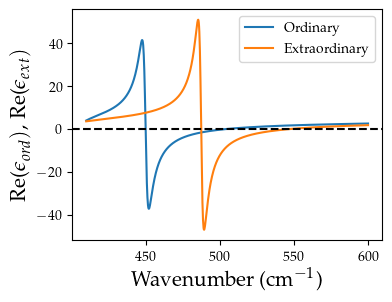

In [1028]:
plt.rcParams["figure.figsize"] = (4,3)
plt.plot(wavenumber, np.real(E_zz), label = "Ordinary")
plt.plot(wavenumber, np.real(E_xx), label = "Extraordinary")
plt.xlabel('Wavenumber (cm$^{-1}$)', fontsize = 15)
plt.ylabel("Re($\epsilon_{ord})$, Re($\epsilon_{ext})$", fontsize = 15)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

In [1038]:
prism_permittivity = 5.5
d = 0.000001

In [1039]:
kx = wavenumber * np.sqrt(prism_permittivity) * np.sin(np.pi/4.)

kz1 = np.sqrt((prism_permittivity * wavenumber**2) - kx**2 + 0j)

kz2 = np.sqrt(wavenumber**2 - kx**2 + 0j)

kz3 = np.sqrt(((wavenumber**2) * E_xx) +0j - ((kx**2) * E_xx/E_zz))

for i, element in enumerate(kz3):
  if np.imag(element) < 0:
      kz3[i] = np.real(element)*-1 + 1j * np.abs(np.imag(element))


In [1040]:
reflectivity = ((E_xx*kz1 - prism_permittivity*kz3)/ ( E_xx*kz1 + prism_permittivity*kz3))
reflectivity = reflectivity * np.conjugate(reflectivity)

In [1041]:
big_matrix = np.array(
    [-1* np.exp(1j * kz1 * d),
    np.exp(-1j * kz2 * d),
    np.exp(1j * kz2 * d),
    np.zeros_like(kz1),

    kz1 * np.exp(1j * kz1 * d) / prism_permittivity,
    kz2 * np.exp(-1j * kz2 * d),
    -1 * kz2 * np.exp(1j * kz2 * d),
    np.zeros_like(kz1),

    np.zeros_like(kz1),
    np.ones_like(kz1),
    np.ones_like(kz1),
    -1 * np.ones_like(kz1),

    np.zeros_like(kz1),
    -1 * np.ones_like(kz1),
    np.ones_like(kz1),
    (kz3) / (E_xx * kz2)]
    ).T

In [1042]:
inversed_list = np.array([inverse(big_matrix[i,:].reshape(4,4)) for i in range(0,len(big_matrix))])

F_array = np.array([[np.exp(-1j * element * d), element * np.exp(-1j * element * d) / prism_permittivity, 0 , 0] for element in kz1])

b1_a1 = np.array([inversed_list[i,:,:]@((F_array[i,:].reshape(4,1))) for i in range (0,len(inversed_list))])[:,0]

reflection = np.array([element * np.conjugate(element) for element in b1_a1])

/Users/usermc/.virtualenvs/optics/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(1.3, 550, '$\\omega_{L2,ext}$')

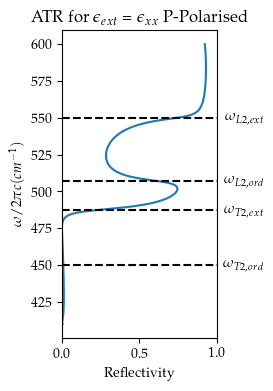

In [1043]:
plt.rcParams["figure.figsize"] = (2,4)
plt.plot(reflection,wavenumber)
plt.xlabel('Reflectivity')
plt.ylabel('$\omega/2\pi c (cm^{-1})$')
plt.xlim(0,1)
plt.title('ATR for $\epsilon_{ext}$ = $\epsilon_{xx}$ P-Polarised')

plt.hlines(450,0,1,'black','dashed')
plt.text(1.3, 450, '$\omega_{T2,ord}$', ha='right', va='center')

plt.hlines(507,0,1,'black','dashed')
plt.text(1.3, 507, '$\omega_{L2,ord}$', ha='right', va='center')

plt.hlines(487.5,0,1,'black','dashed')
plt.text(1.3, 487, '$\omega_{T2,ext}$', ha='right', va='center')

plt.hlines(550,0,1,'black','dashed')
plt.text(1.3, 550, '$\omega_{L2,ext}$', ha='right', va='center')